## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load and Check Data

In [3]:
df = pd.read_csv(r"C:\Users\kubrabdincer\PycharmProjects\pythonProject\Datasets\supermarket_sales - Sheet1.csv")

## Examining the Dataset

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.shape

(1000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

## Missing Values

In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Examination of the Basic Statistics of the Dataset


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


## Attribute information


###### Invoice id: Computer generated sales slip invoice identification number
###### Branch: Branch of supercenter (3 branches are available identified by A, B and C).
###### City: Location of supercenters
###### Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
###### Gender: Gender type of customer
###### Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
###### Unit price: Price of each product in $
###### Quantity: Number of products purchased by customer
###### Tax: 5 % tax fee for customer buying
###### Total: Total price including tax
###### Date: Date of purchase (Record available from January 2019 to March 2019)
###### Time: Purchase time (10am to 9pm)
###### Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
###### COGS: Cost of goods sold
###### Gross margin percentage: Gross margin percentage
###### Gross income: Gross income
###### Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


In [11]:
for col in df.columns:
    print(col, df[col].nunique())

Invoice ID 1000
Branch 3
City 3
Customer type 2
Gender 2
Product line 6
Unit price 943
Quantity 10
Tax 5% 990
Total 990
Date 89
Time 506
Payment 3
cogs 990
gross margin percentage 1
gross income 990
Rating 61


In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="object"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes!="object"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and dataframe[col].dtypes=="object"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes!="object"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    num_cols = [col for col in num_cols if col not in ["Date","Time"]]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car, num_but_cat
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 1000
Variables: 17
cat_cols: 7
num_cols: 7
cat_but_car: 2
num_but_cat: 1


## Visualization of Categorical and Numerical Variables

   Branch  Ratio
A     340   34.0
B     332   33.2
C     328   32.8


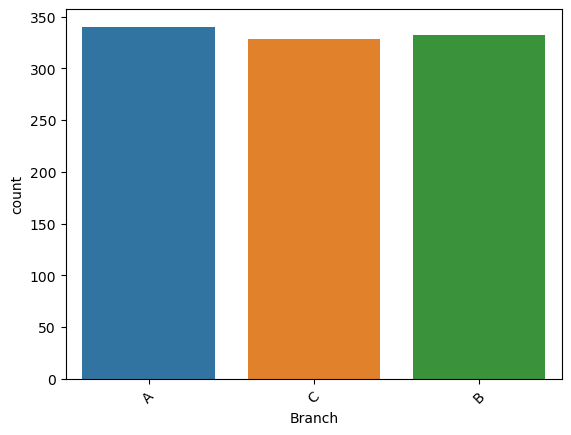

           City  Ratio
Yangon      340   34.0
Mandalay    332   33.2
Naypyitaw   328   32.8


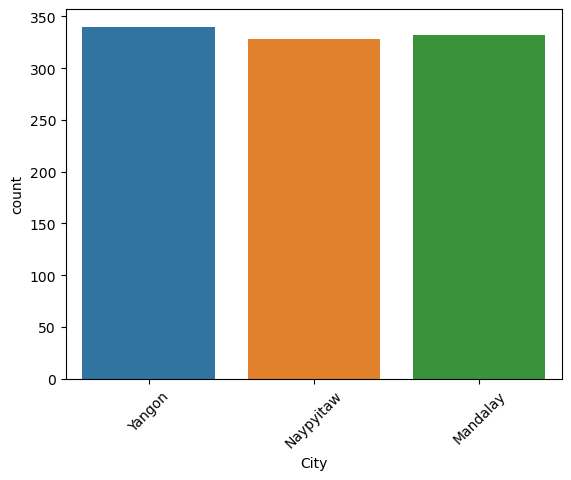

        Customer type  Ratio
Member            501   50.1
Normal            499   49.9


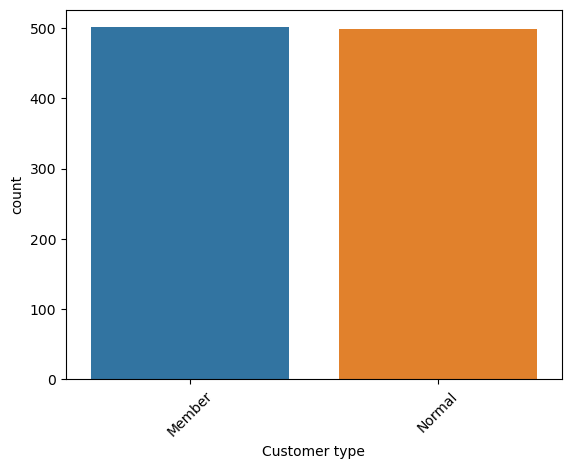

        Gender  Ratio
Female     501   50.1
Male       499   49.9


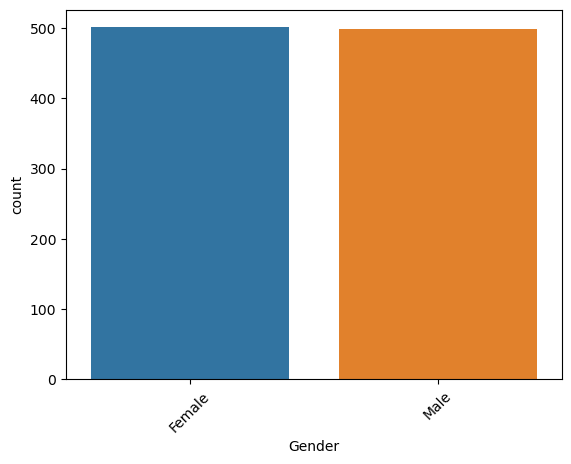

                        Product line  Ratio
Fashion accessories              178   17.8
Food and beverages               174   17.4
Electronic accessories           170   17.0
Sports and travel                166   16.6
Home and lifestyle               160   16.0
Health and beauty                152   15.2


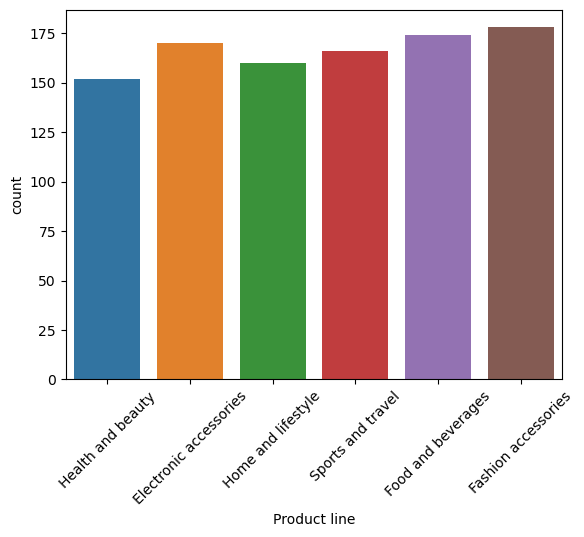

             Payment  Ratio
Ewallet          345   34.5
Cash             344   34.4
Credit card      311   31.1


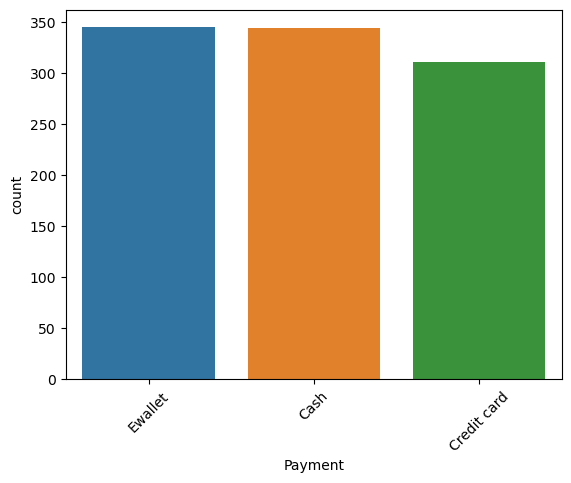

          gross margin percentage  Ratio
4.761905                     1000  100.0


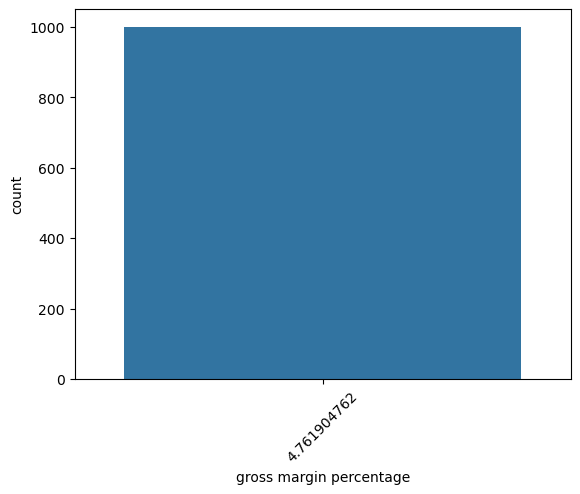

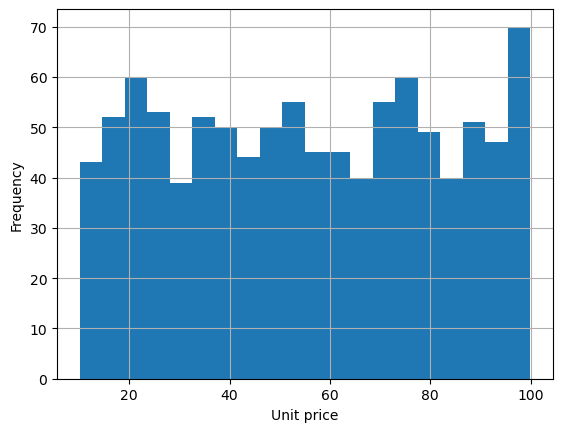

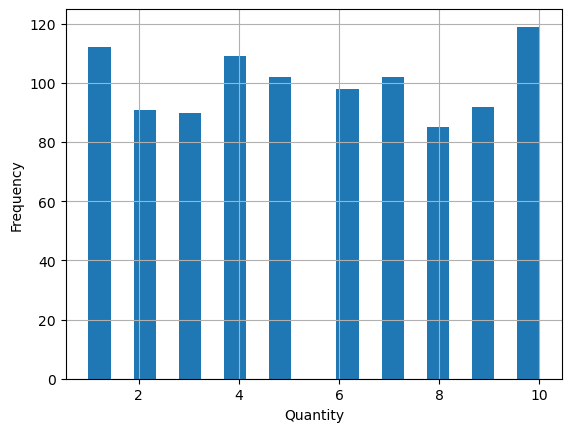

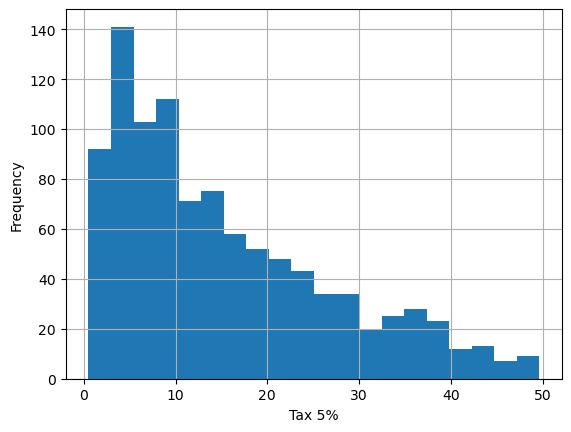

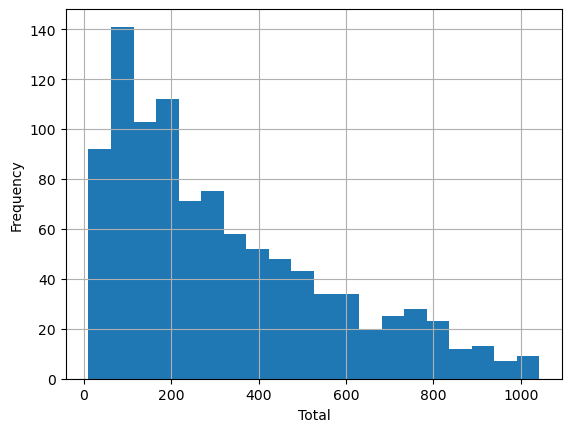

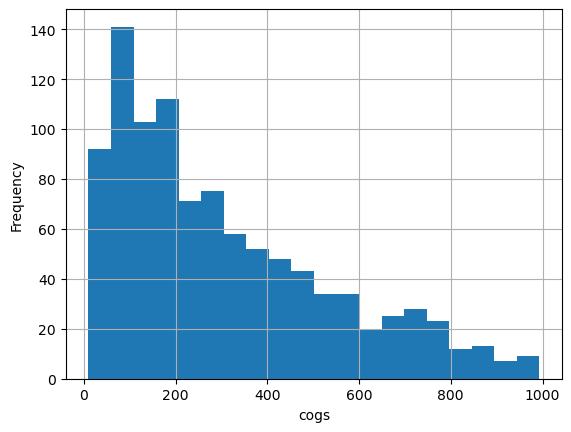

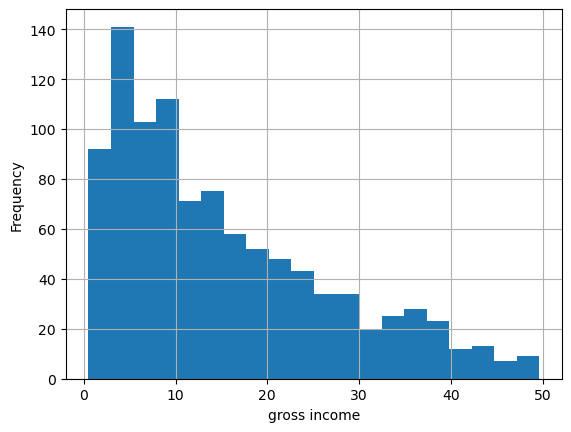

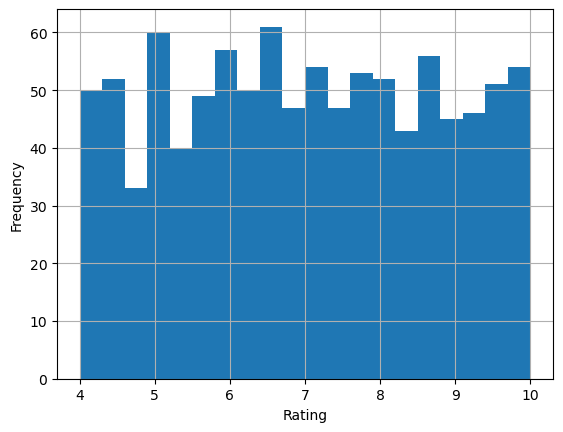

In [13]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation=45) 
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

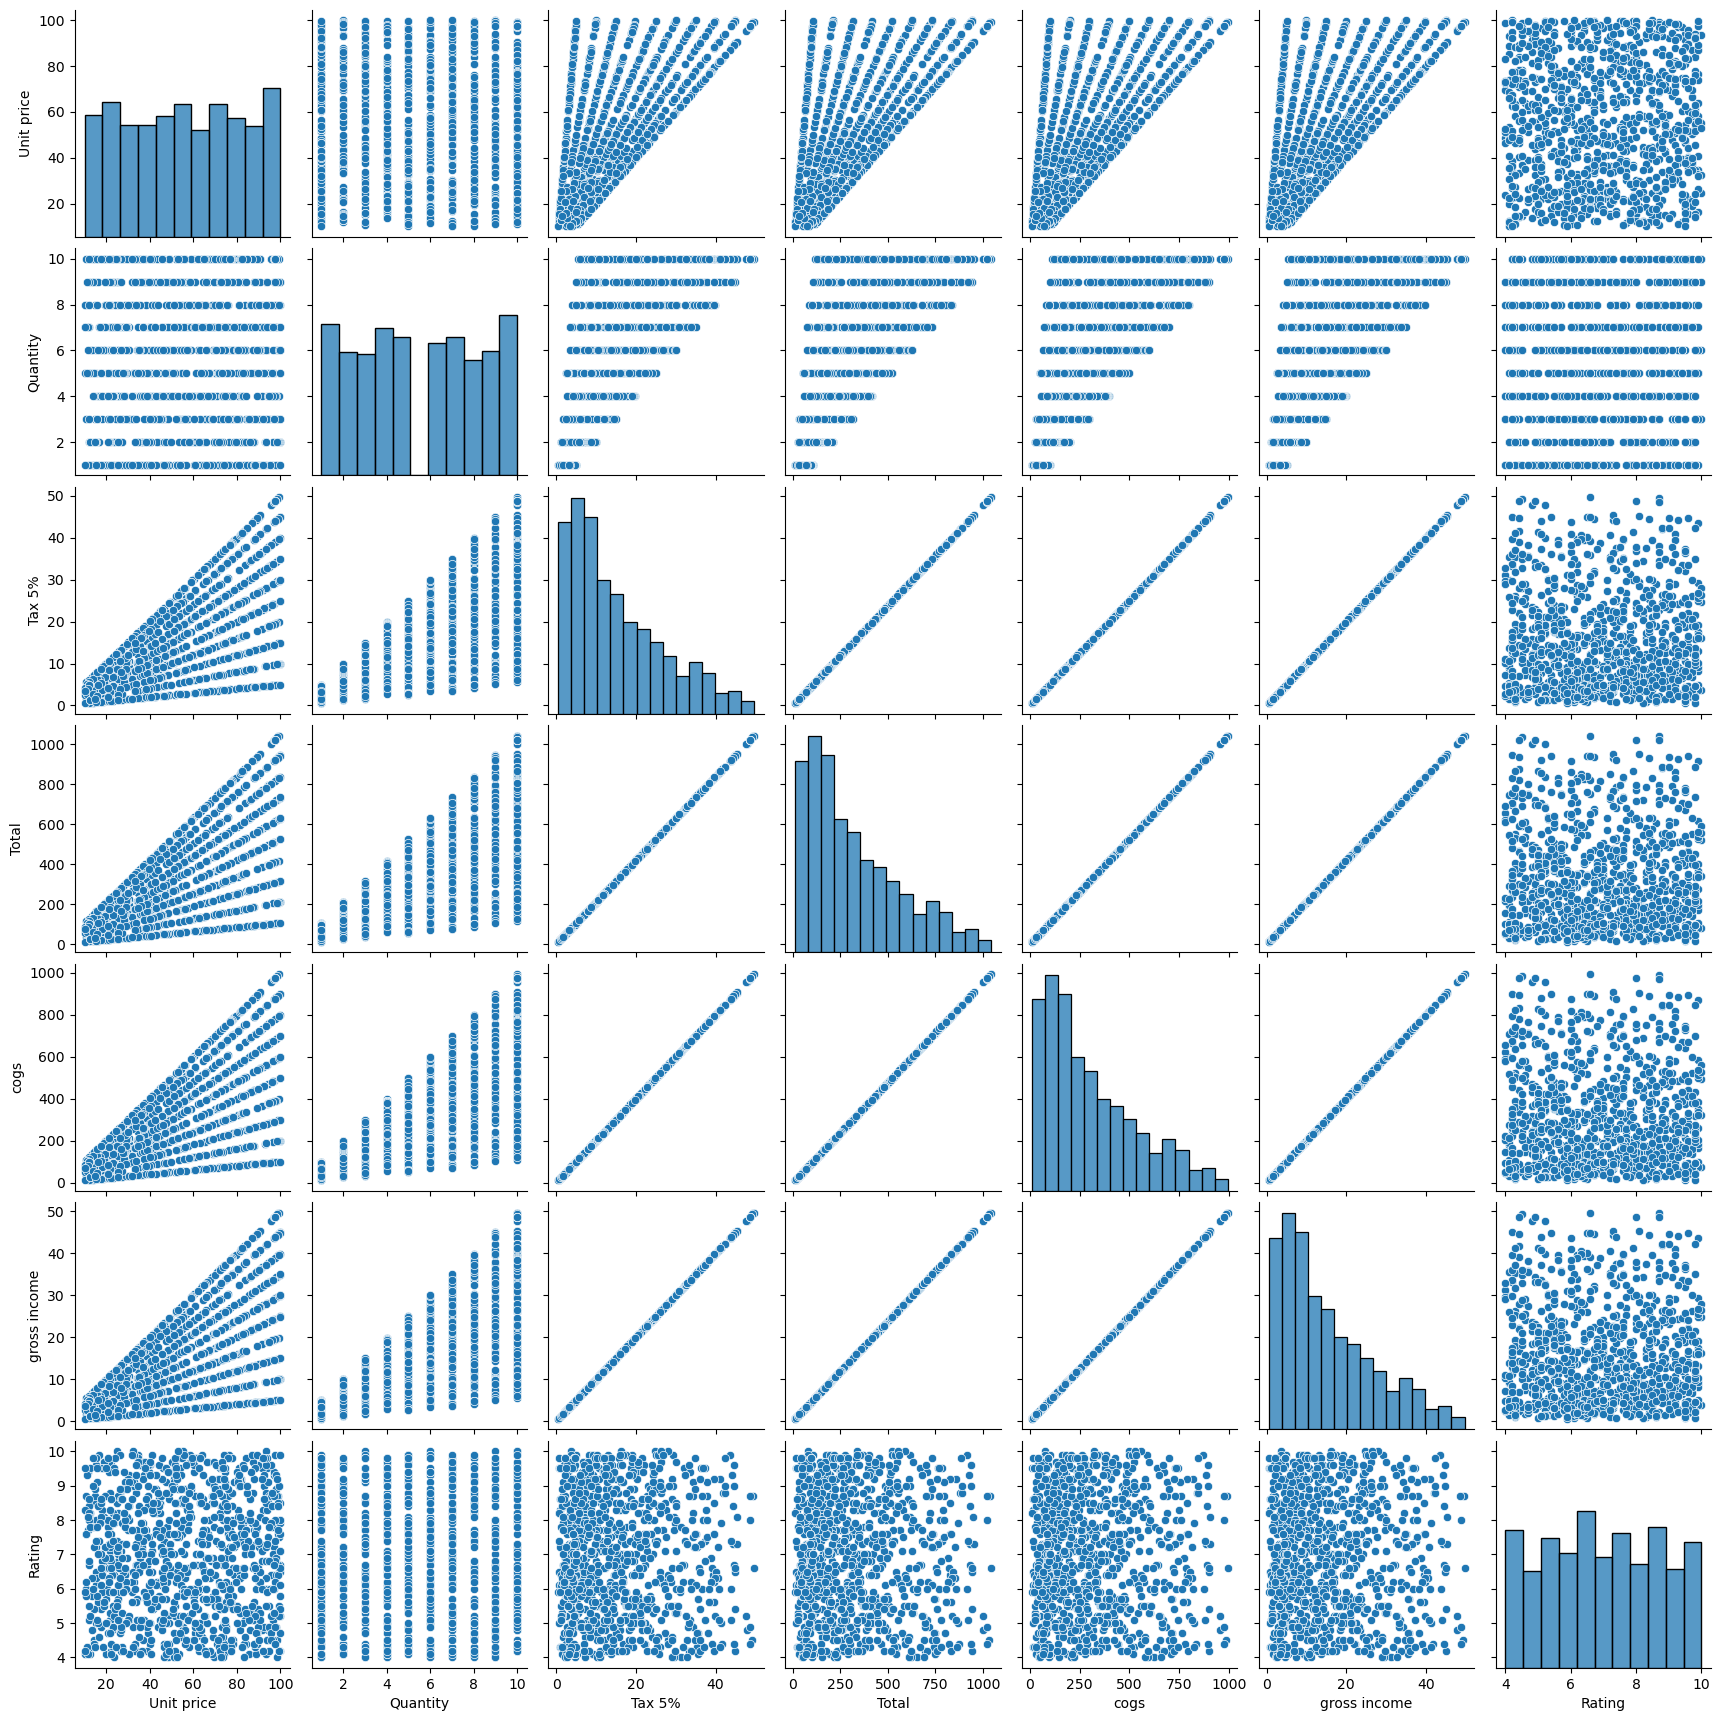

In [14]:
num_data = df[num_cols]
sns.pairplot(data=num_data)

In [15]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
df.groupby("Branch").agg({"Total":"sum"})

,Total
Branch,
A,106200.3705
B,106197.6720
C,110568.7065


In [17]:
df[["Gender","Customer type"]].value_counts()

Gender  Customer type
Female  Member           261
Male    Normal           259
Female  Normal           240
Male    Member           240
dtype: int64

In [18]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [19]:
df.groupby("Payment").agg({"Total":"sum",
                          "Payment":"count"})

,Total,Payment
Payment,,
Cash,112206.570,344
Credit card,100767.072,311
Ewallet,109993.107,345


## Feature Engineering

### Analysis of Outliers

In [20]:
def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    return low_limit, up_limit

outlier_thresholds(df,"Rating")

(-0.049999999999998046, 13.949999999999998)

In [21]:
def check_outlier(dataframe, col_name):
    low_limit , up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit)].any(axis=None):
        return True
    else:
        return False

    
for col in num_cols:
    print(col, check_outlier(df,col))

Unit price False
Quantity False
Tax 5% False
Total False
cogs False
gross income False
Rating False


## Correlation Between Variables

C:\Users\kubrabdincer\AppData\Local\Temp\ipykernel_18320\3656117991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\kubrabdincer\AppData\Local\Temp\ipykernel_18320\3656117991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

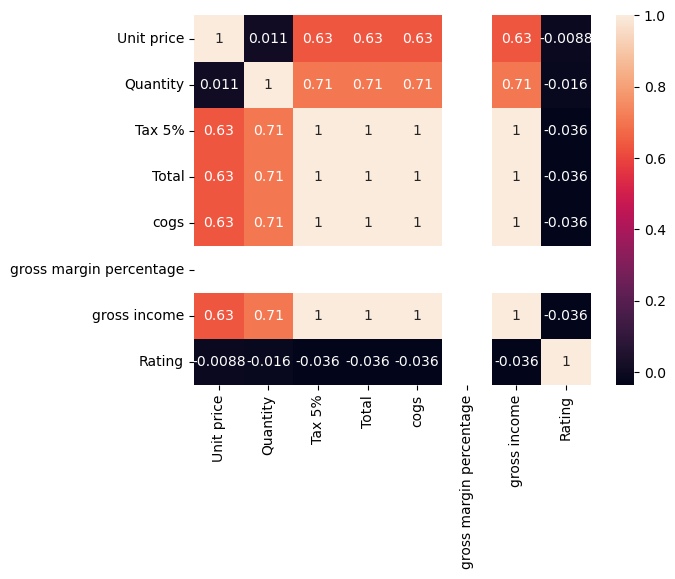

In [22]:
df.corr()
sns.heatmap(df.corr(), annot=True)

In [23]:
cor = df.corr()
cor_target = abs(cor["Total"])
cor_target

C:\Users\kubrabdincer\AppData\Local\Temp\ipykernel_18320\3219551862.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


Unit price                 0.633962
Quantity                   0.705510
Tax 5%                     1.000000
Total                      1.000000
cogs                       1.000000
gross margin percentage         NaN
gross income               1.000000
Rating                     0.036442
Name: Total, dtype: float64

In [24]:
relative_features = cor_target[cor_target>0.8]
relative_features

Tax 5%          1.0
Total           1.0
cogs            1.0
gross income    1.0
Name: Total, dtype: float64

In [25]:
print(df[["Tax 5%","cogs","gross income"]].corr())

              Tax 5%  cogs  gross income
Tax 5%           1.0   1.0           1.0
cogs             1.0   1.0           1.0
gross income     1.0   1.0           1.0


## Results
#### The branch with the highest sales is A.
#### The number of male and female customers and member and normal customers are almost equal.
#### Members have paid more money.
#### The product group with the most purchases is fashion accessories.
#### The most preferred payment method is e-wallet, and the highest amount of payments has been made in cash.